
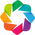

In [1]:
# import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

import scipy.stats as ss
import holoviews as hv
hv.extension('bokeh','matplotlib')
%opts Curve Scatter Bars [tools=['hover']]

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style("whitegrid")
color = sns.color_palette()

In [22]:
df= pd.read_csv("Adsk_dataset_clean2.csv")

C:\Users\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
df.shape

(55107, 122)

## Seats Activation Percentage

In [24]:
df["percentage_reg_seats_activated"][df["percentage_reg_seats_activated"] == 100] = 1.00


C:\Users\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
%%opts Distribution [width=600 height=400]

hv.Distribution(df, 'percentage_reg_seats_activated')

:Distribution   [percentage_reg_seats_activated]   (Density)

### Group by Activation Percentage

C:\Users\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Text(0.5,1,'Activation Percentage')

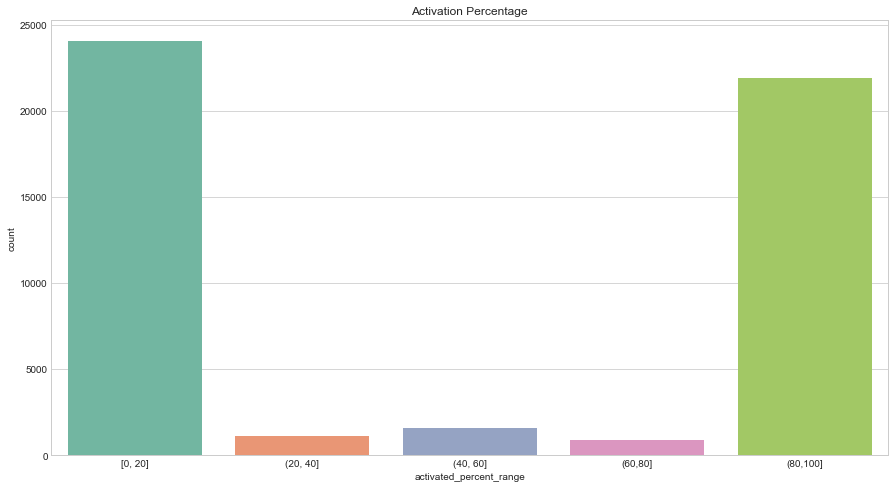

In [77]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
df['activated_percent_range'] = pd.cut(df["percentage_reg_seats_activated"], [0.0,0.2,0.4, 0.6,0.8, 1],
                                       include_lowest=True, labels=['[0, 20]', '(20, 40]','(40, 60]','(60,80]','(80,100]'])

sns.countplot(x="activated_percent_range", data=df, palette="Set2", ax=axis1).set_title('Activation Percentage')

Users are clustered at [0,20] and (80,100] groups

#### Activation by Size

Text(0.5,1,'Activation by Business Size')

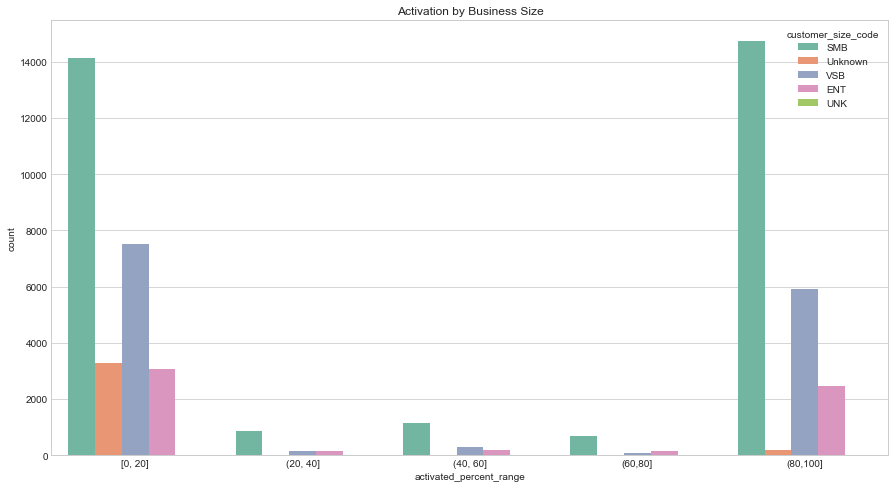

In [45]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))

sns.countplot(x="activated_percent_range",hue="customer_size_code", data=df, palette="Set2", ax=axis1).set_title('Activation by Business Size')

Low activation group : SMB> VSB> ENT, the rest are unknown size

#### Activation by Contract Term

Text(0.5,1,'Activation by Contract Term')

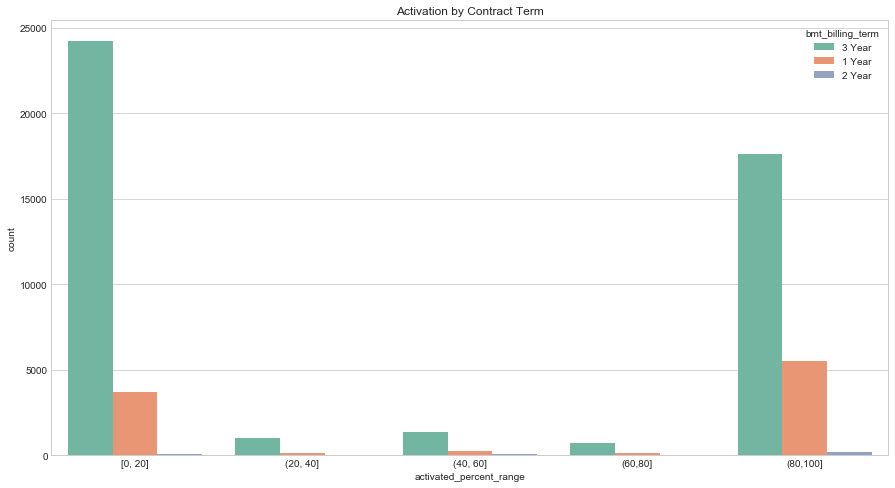

In [44]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))

sns.countplot(x="activated_percent_range",hue="bmt_billing_term", data=df, palette="Set2", ax=axis1).set_title('Activation by Contract Term')

For low activation group [0,20], most are 3 yr contract

### Activation group : 0-40%(low), 40%- 80%(medium), 80%-100%(high)

Text(0.5,1,'Activation Group')

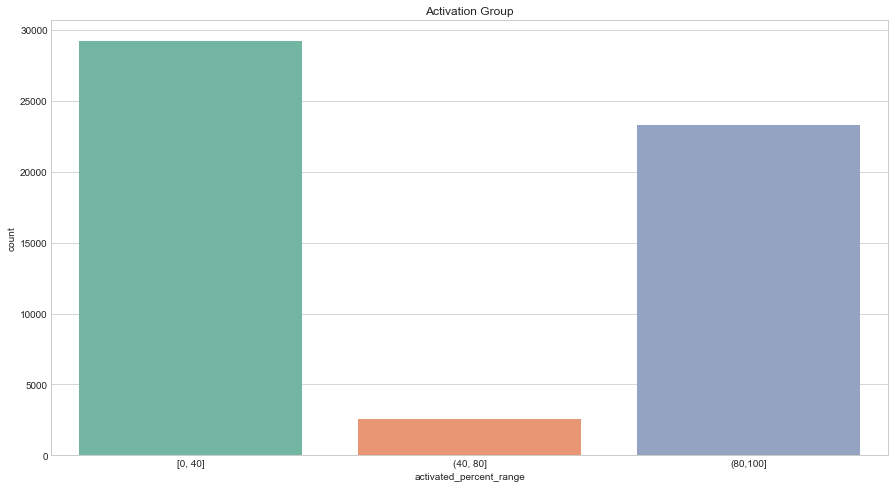

In [46]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
df['activated_percent_range'] = pd.cut(df["percentage_reg_seats_activated"], [0.0,0.4,0.8, 1],
                                       include_lowest=True, labels=['[0, 40]','(40, 80]','(80,100]'])

sns.countplot(x="activated_percent_range", data=df, palette="Set2", ax=axis1).set_title('Activation Group')

## Low Activation (0-40%) 

In [54]:
df2= df[df['activated_percent_range'] == '[0, 40]']
df2.shape

(29215, 123)

### Business Size

Text(0.5,1,'Low Activation vs Size')

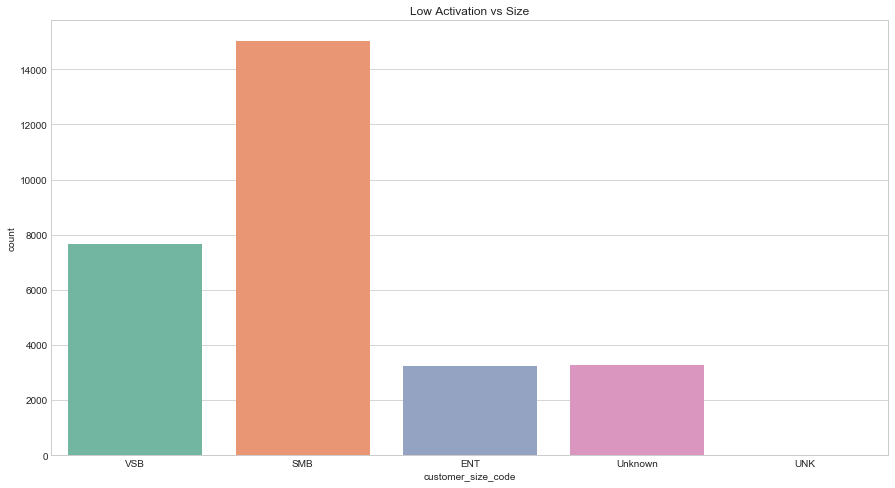

In [56]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="customer_size_code", data=df2, palette="Set2", ax=axis1).set_title('Low Activation vs Size')

### Industry

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

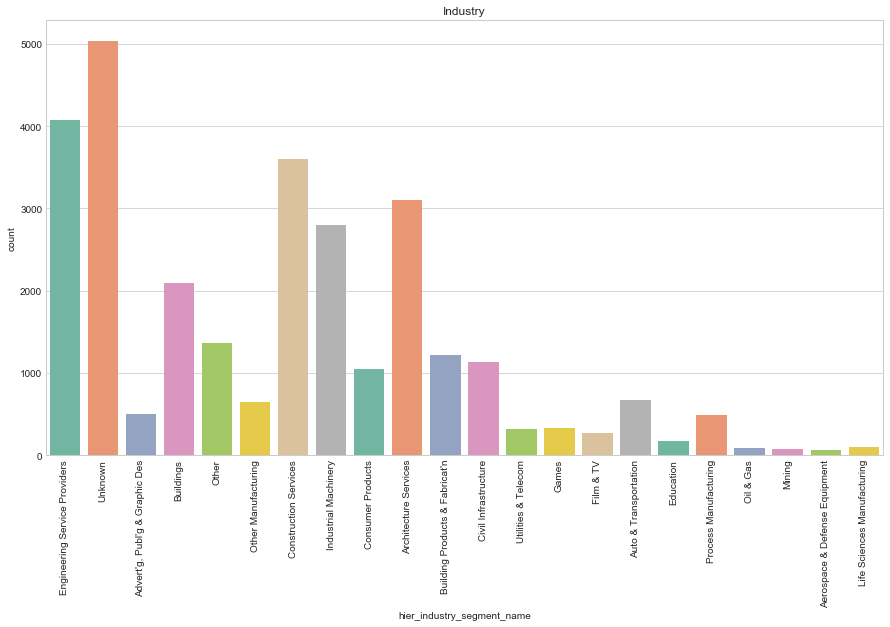

In [65]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="hier_industry_segment_name", data=df2, palette="Set2", ax=axis1).set_title('Industry')
plt.xticks(rotation=90)

### Geo

Engineering> construction> architecture> Industrial Machinery 

Text(0.5,1,'Industry')

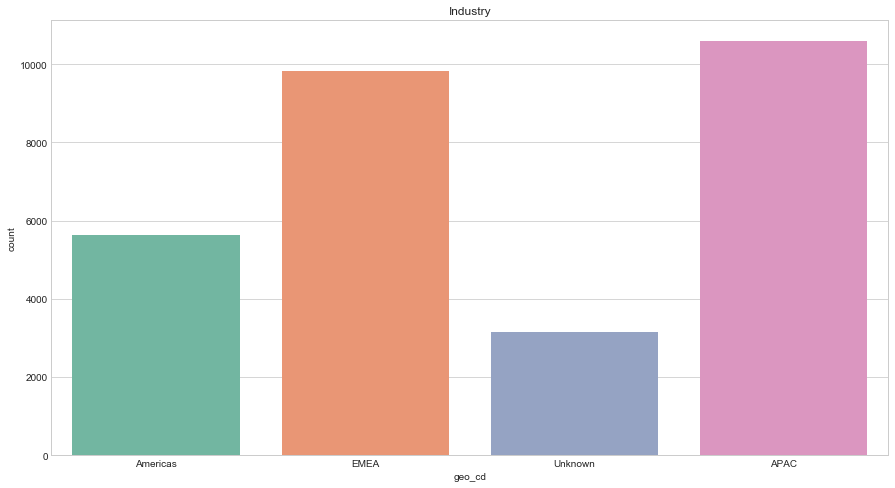

In [66]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="geo_cd", data=df2, palette="Set2", ax=axis1).set_title('Geo')

### Channel

Text(0.5,1,'Channel')

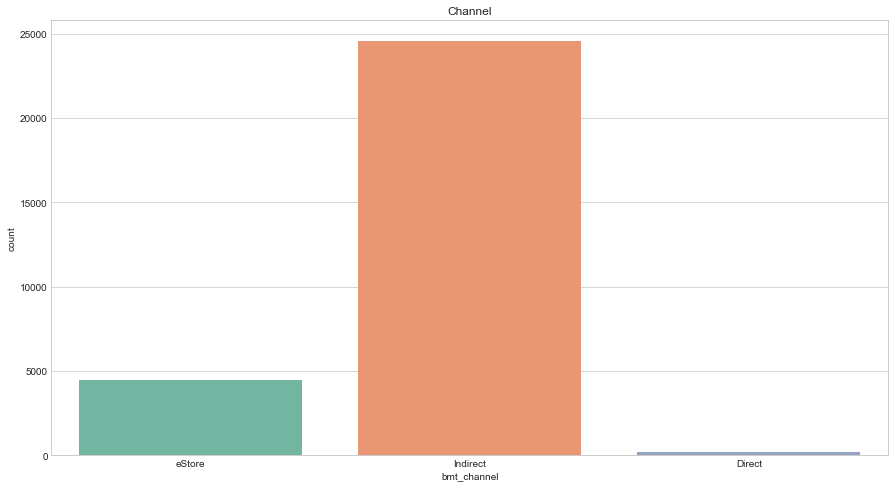

In [69]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="bmt_channel", data=df2, palette="Set2", ax=axis1).set_title('Channel')

### Order Type

Text(0.5,1,'Channel')

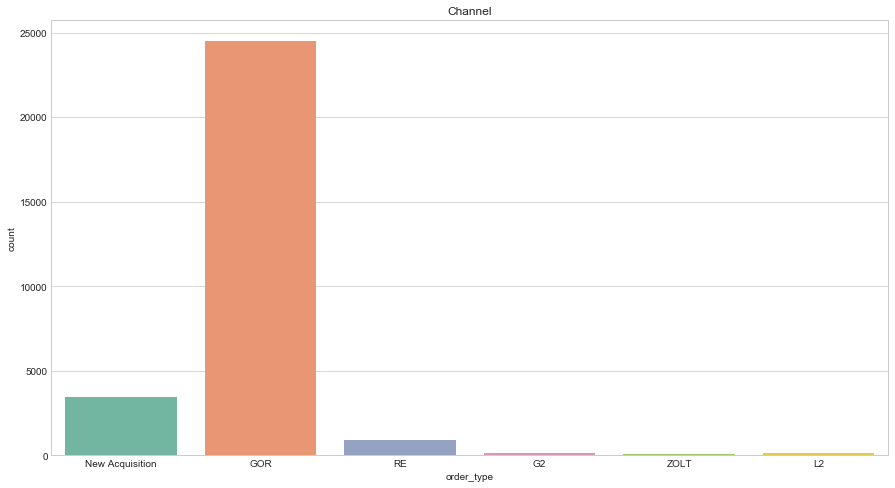

In [70]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="order_type", data=df2, palette="Set2", ax=axis1).set_title('Order_Type')

### Onboarding Health

Text(0.5,1,'Order_Type')

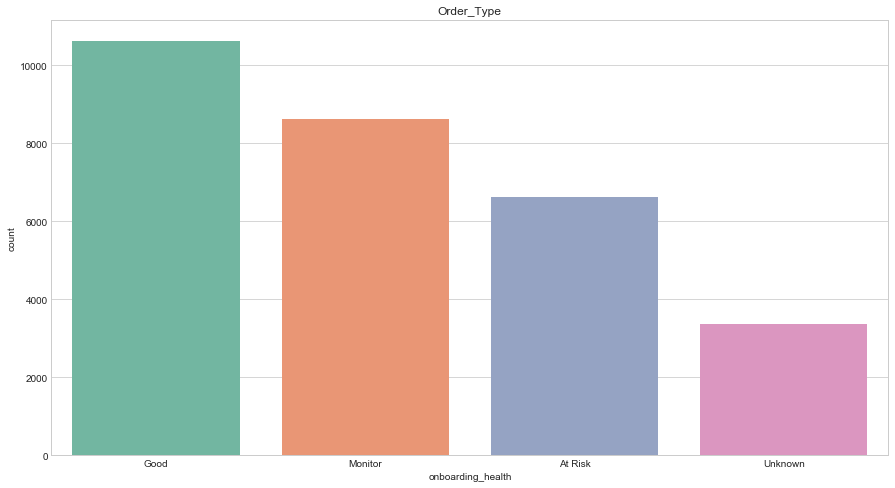

In [71]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="onboarding_health", data=df2, palette="Set2", ax=axis1).set_title('Onboarding Health')

### Current Segment

Text(0.5,1,'Onboarding Health')

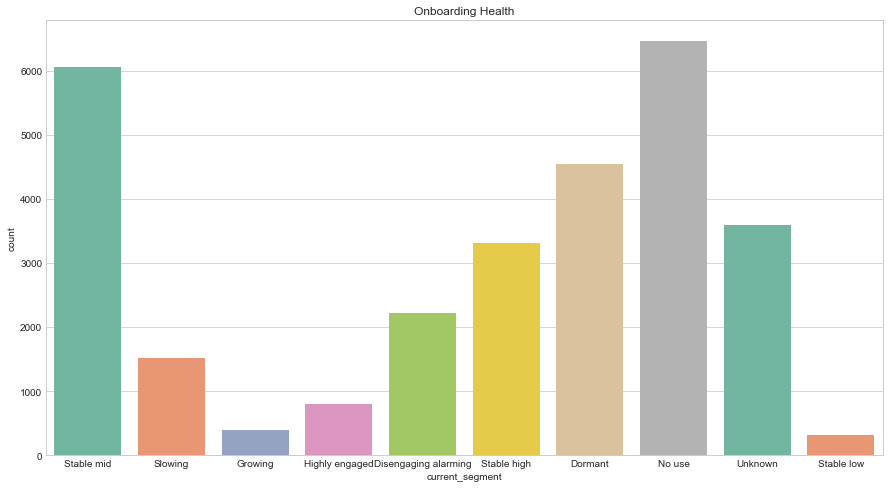

In [72]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="current_segment", data=df2, palette="Set2", ax=axis1).set_title('Current Segment')

## Clearning NaN

In [73]:
# columns with NaN
df_na = pd.DataFrame(df.isnull().sum())
df_na[(df_na >0).any(1)]

,0
uuid_seats_on_active_subs,3281
readiness_score,3281
parent_owner_uuid_count,3281
onboarding_score,4725
onboarding_access_score,4725
onboarding_product_utilization_score,4725
onboarding_support_score,4725


In [74]:
# Drop NaNs

df = df.dropna()
df_na = pd.DataFrame(df.isnull().sum())
df_na[(df_na >0).any(1)]

,0


### Onbarding Score by Activation Group

In [79]:
%%opts BoxWhisker [width=600 height=400] 

hv.BoxWhisker(df, kdims=['activated_percent_range'], vdims=['onboarding_score'])

:BoxWhisker   [activated_percent_range]   (onboarding_score)